# 期中练习

## 要求

检验对上半学期知识的掌握，课后自行完成，可查阅各种资料。

### 如何提交

- 复制本文件，文件名改为`教学班号-编号.ipynb`。例如刘国强同学是2班第15号，文件名应改为`2-15.ipynb`。
- 在复制文件中答题，每道题的答案紧接题目。
- 答题结束后commit该文件，并提交pull request。



In [43]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch import autograd

## 练习1

为了分析自变量$x$和因变量$y$的关系，通过测量得到带误差的20个样本数据如下所示

In [44]:
X = np.array([ 0.70846042, -0.68388789,  1.03780474,  1.08334621,  0.77026309,
        0.19722004, -0.46819526, -0.45270204,  0.02362673,  0.06549472,
        0.08898416,  0.59424455, -0.26400365,  0.2456922 ,  0.5114847 ,
       -0.31604016, -1.49329364,  1.24112288,  1.01993764,  1.75634392])

In [45]:

Y = np.array([ 4.49682518,  3.5737603 ,  7.93568197,  3.58719009,  5.38341441,
        5.47930021, -0.9861325 , -0.15686681,  2.36963799,  4.01600211,
       -0.20329642,  3.07728831, -1.30408343,  2.84796441,  2.27915787,
        2.62078689, -1.2855133 ,  4.39242028,  6.24385669,  6.00822241])

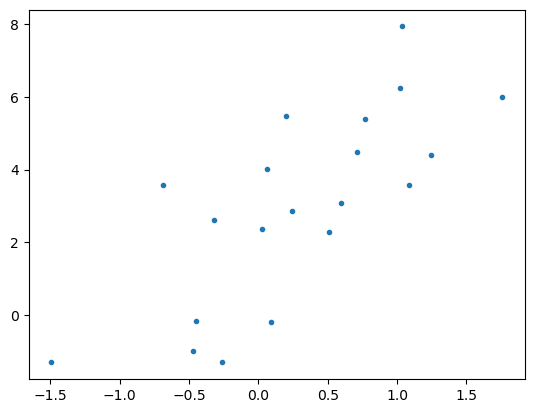

In [46]:
plt.plot(X, Y, ".")

### 1.1 划分训练集和测试集

将20个数据点划分为训练集和测试集，期中训练集为前15个数据点，测试集为后5个。

In [47]:
x_train=X[0:15]
x_test=X[15:20]
y_train=Y[0:15]
y_test=Y[15:20]

### 1.2 数据建模

分别用1到4次多项式函数作为模型拟合训练集中的数据，并分别计算每个模型与数据的均方差（MSE）。

哪一个模型与训练数据拟合最好？

[3.6141199809365916, 3.4709875708912987, 3.0102468155333737, 2.397166165471182]


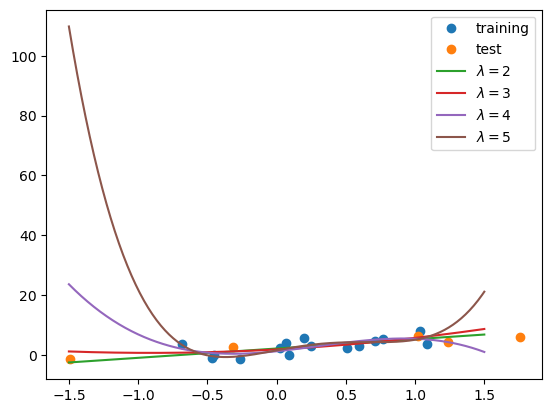

In [49]:
def regression(x, y, n):
    rows = [x**i for i in reversed(range(n))]
    A = np.vstack(rows).T
    theta = np.linalg.solve(A.T@A, A.T@y)
    return theta

def model(x,theta):
    n=len(theta)
    y=np.zeros_like(x)
    for w,i in zip(theta,reversed(range(n))):
        y+=w*x**i
    return y

plt.plot(x_train, y_train, "o", label="training")
plt.plot(x_test, y_test, "o", label="test")
ES=[]
x_m=np.linspace(-1.5,1.5,200)
for n in range(2,6):
    theta=regression(x_train,y_train,n)
    y_train_pre=model(x_train,theta)
    E=y_train_pre-y_train
    E=np.dot(E,E)/len(y_train)
    ES.append(E)
    y_m=model(x_m,theta)
    plt.plot(x_m, y_m, label=r"$\lambda={}$".format(n))
print(ES)
plt.legend()

## 答案
4次多项式的模型拟合最好

### 1.3 模型测试
计算4个模型与测试数据的均方差，哪一个模型与测试数据拟合最好？

1.2和1.3的答案是否相同？两者的异同有什么意义？

In [50]:
ES2=[]
for n in range(2,6):
    theta=regression(x_train,y_train,n)
    y_test_pre=model(x_test,theta)
    E=y_test_pre-y_test
    E=np.dot(E,E)/len(y_train)
    ES2.append(E)
print(ES2)

[0.6457762674229695, 2.30829530542055, 48.51276392897373, 905.8332589333962]


## 答案
从测试数据集看1次多项式模型拟合最好
1.2与1.3的答案不相同，1.2里面使用训练集进行测试会出现过拟合现象，故两次测试出的不同才能有效验证模型的有效性

## 练习2 人工神经网络

有如下神经网络：
- 输入$x$是2维向量，输出$y$是1维标量
- 包含两个全连接层
    - 第一层有5个神经元，激活函数为sigmoid
    - 第二层有1个神经元，激活函数为relu
- 损失函数为均方差MSE

### 2.1 写出公式

- 写出relu、sigmoid函数的公式
- 写出整个神经网络的公式

rule公式：
$$y = max (0, x)$$
sigmoid公式：
$$y=\frac{1}{1 + e ^{-x}}$$
神经网络公式：
$$net1=W_1*x+B_1$$
$$out1=\frac{1}{1 + e ^{-net1}}$$

$$net2=W_2*out1+B_2$$     
$$out2=max (0, net2)$$

### 2.2 正向传播

假设已知4个数据点的输入'X'，参考输出'Y'，参数'W_1'、'B_1'、'W_2'、'B_2'，。

- 正向传播计算输出预测值'Y_pred'
- 计算损失值'L'


In [76]:
X = np.array([[-0.05025071,  1.12345037],
       [-1.2771336 , -0.03387919],
       [-0.06085093,  0.83960333],
       [ 0.26666122, -0.15723225]])

注意，这里输入'x'表示为行向量，即'X'中每行表示一个数据点。

In [77]:
Y = np.array([[ 0.34942997],
       [ 0.09796396],
       [ 1.80617515],
       [-0.50698293]])

In [78]:
W1 = np.random.randn(2,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,1)
b2 = np.random.randn(1,1)

In [79]:
W1 = np.array([[-0.15772071,  2.4169384 ,  1.18656177,  0.74048303,  0.95473468],
       [ 1.75613621,  0.44768404,  0.25003215,  0.52863169, -0.75204543]])

In [80]:

b1 = np.array([-1.00393578, -0.19942106, -1.23939537,  1.62336519, -0.21580562])

In [81]:
W2 = np.array([[ 0.8173788 ],
       [-0.01165333],
       [ 1.10703394],
       [ 0.90372372],
       [ 0.86510315]])

In [82]:
b2 = np.array([[0.277288]])

In [83]:
#numpy法
def sigmoid(x):
    return 1/(1+np.exp(-x))
def rule(x):
    return max(0,x)

#计算一层激活值代码
def fc_layer(x,w,b,act_func):
    z=x@w+b
    y_out=act_func(z)
    return z,y_out

#前向传播
def forward(x,w1,w2,b1,b2):
    z2,a2=fc_layer(x,w1,b1,sigmoid)
    z3,a3=fc_layer(a2,w2,b2,rule)
    return a3

print("y_pred=")
for i in range(0,4):
    y_pred=forward(X[i],W1,W2,b1,b2)
    print(y_pred)

y_pred=
[[2.18514844]]
[[1.35081552]]
[[2.09965131]]
[[1.98338406]]


In [84]:
#pytorch

X = torch.tensor(X, dtype=torch.float)
Y = torch.tensor(Y, dtype=torch.float)
W1 = torch.tensor(W1, dtype=torch.float, requires_grad=True)
W2 = torch.tensor(W2, dtype=torch.float, requires_grad=True)
b1 = torch.tensor(b1, dtype=torch.float, requires_grad=True)
b2 = torch.tensor(b2, dtype=torch.float, requires_grad=True)

def forward(X,b1,b2,W1,W2):
    Z1 = torch.mm(X, W1) + b1
    f1 = torch.sigmoid(Z1)
    Z2 = torch.mm(f1, W2) + b2
    f2 = torch.relu(Z2)
    return f2

Y_pre = forward(X,b1,b2,W1,W2)
y_pre=[]
for i in range (0,4):
    y_pre.append(Y_pre.tolist()[i][0])
print("预测值‘Y_pre’:{}".format(y_pre))
loss_fn = torch.nn.MSELoss(reduction='sum')
loss = loss_fn(Y_pre, Y)
loss = loss/4
print("损失值‘L’:{}".format(loss.item()))

预测值‘Y_pre’:[2.1851484775543213, 1.3508155345916748, 2.0996510982513428, 1.9833840131759644]
损失值‘L’:2.806889057159424


### 2.3 方向传播

计算损失值'L'对参数'W_1'、'B_1'、'W_2'、'B_2'的偏导数。

In [85]:
loss.backward()

print("损失值'L'对参数'W_1的偏导数{}".format(W1.grad))
print("损失值'L'对参数'b_1的偏导数{}".format(b1.grad))
print("损失值'L'对参数'W_2的偏导数{}".format(W2.grad))
print("损失值'L'对参数'b_2的偏导数{}".format(b2.grad))

损失值'L'对参数'W_1的偏导数tensor([[-0.1006, -0.0005,  0.0123, -0.1289, -0.0468],
        [ 0.1610, -0.0028,  0.2034,  0.0697,  0.1433]])
损失值'L'对参数'b_1的偏导数tensor([ 0.4534, -0.0068,  0.5429,  0.3597,  0.5273])
损失值'L'对参数'W_2的偏导数tensor([[1.2055],
        [1.3352],
        [0.6616],
        [2.4261],
        [1.0643]])
损失值'L'对参数'b_2的偏导数tensor([[2.9362]])
